In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary=pd.read_csv("Salary_Data.csv")


In [3]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


EDA and Data visulazation

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
salary.shape

(30, 2)

In [8]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
salary.dropna()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


{'whiskers': [<matplotlib.lines.Line2D at 0x20b6e3e5610>,
 'caps': [<matplotlib.lines.Line2D at 0x20b6e3e6cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b6d6c7410>],
 'medians': [<matplotlib.lines.Line2D at 0x20b6e428310>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b6e3e0ad0>],
 'means': []}

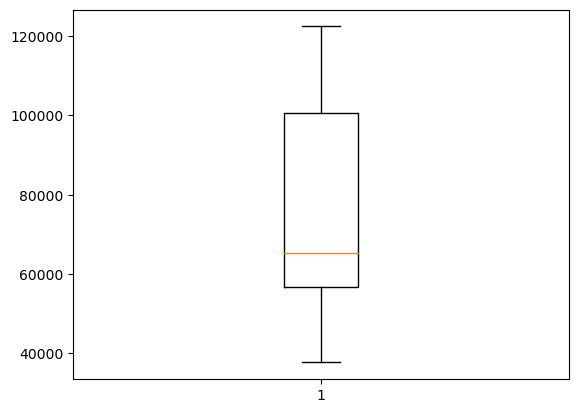

In [10]:
plt.boxplot(salary["Salary"])

{'whiskers': [<matplotlib.lines.Line2D at 0x20b6e4abf50>,
 'caps': [<matplotlib.lines.Line2D at 0x20b6e4c5310>,
 'boxes': [<matplotlib.lines.Line2D at 0x20b6e44bc10>],
 'medians': [<matplotlib.lines.Line2D at 0x20b6e4c64d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20b6e4c6d90>],
 'means': []}

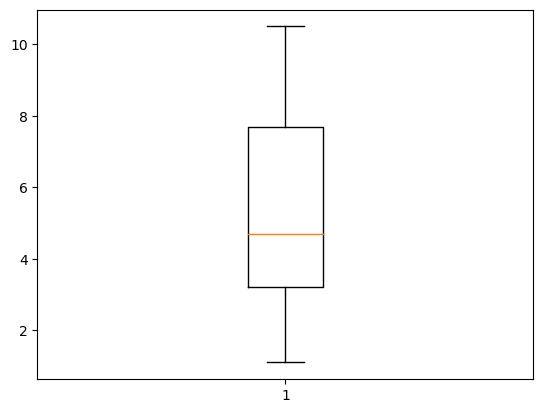

In [11]:
plt.boxplot(salary["YearsExperience"])

C:\Users\100ra\AppData\Local\Temp\ipykernel_20268\1784695571.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary["YearsExperience"])


<Axes: xlabel='YearsExperience', ylabel='Density'>

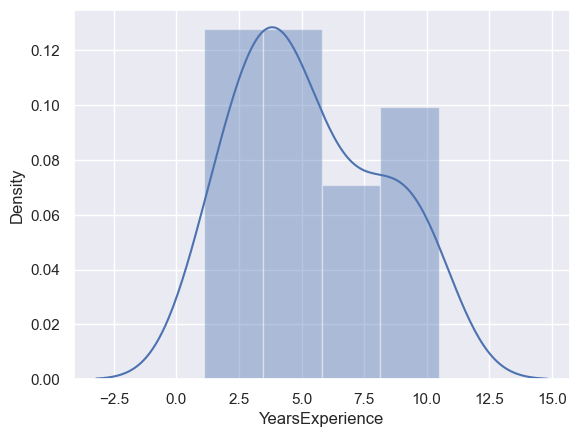

In [12]:
sns.set_theme()
sns.distplot(salary["YearsExperience"])

C:\Users\100ra\AppData\Local\Temp\ipykernel_20268\1425706396.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary["Salary"])


<Axes: xlabel='Salary', ylabel='Density'>

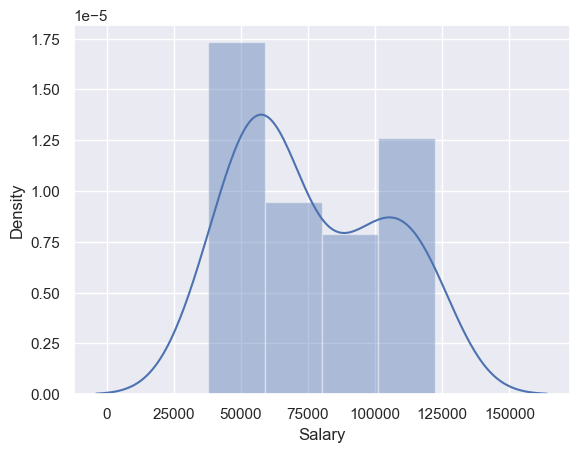

In [13]:
sns.set_theme()
sns.distplot(salary["Salary"])

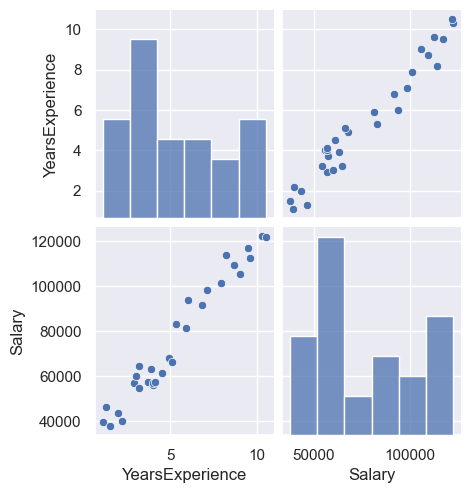

In [14]:
sns.pairplot(salary)

In [15]:
salary.corr()       #CORRELATION ANALYSIS

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='Salary', ylabel='YearsExperience'>

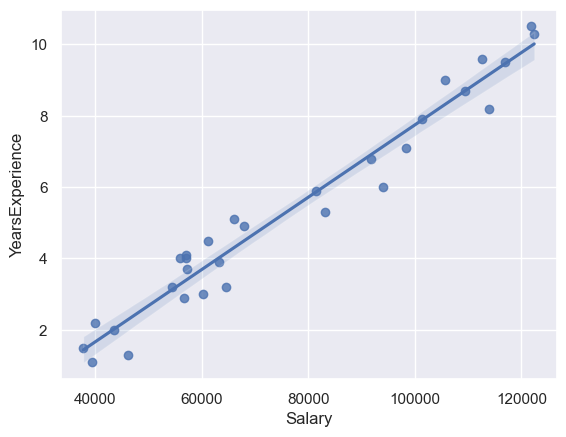

In [17]:
sns.regplot(x=salary["Salary"],y=salary["YearsExperience"])

#fiting model by using linear regression

In [18]:
import statsmodels.formula.api as smf
model=smf.ols("YearsExperience~Salary",data=salary).fit()

In [19]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [20]:
print(model.params,"\n""\n",model.tvalues,"\n""\n",model.pvalues)

Intercept   -2.383161
Salary       0.000101
dtype: float64 

 Intercept    -7.281283
Salary       24.950094
dtype: float64 

 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        19:25:53   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model1=smf.ols("np.log(YearsExperience)~np.log(Salary)",data=salary).fit()

In [25]:
print(model1.params,"\n""\n",model1.tvalues,"\n""\n",model1.pvalues)

Intercept        -16.490132
np.log(Salary)     1.610448
dtype: float64 

 Intercept        -14.977052
np.log(Salary)    16.352542
dtype: float64 

 Intercept         6.781355e-15
np.log(Salary)    7.395278e-16
dtype: float64


# R Square value

In [26]:
(model1.rsquared,model1.rsquared_adj)

(0.905215072581715, 0.9018298966024905)

In [27]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.905
Model:                                 OLS   Adj. R-squared:                  0.902
Method:                      Least Squares   F-statistic:                     267.4
Date:                     Mon, 27 Nov 2023   Prob (F-statistic):           7.40e-16
Time:                             19:32:21   Log-Likelihood:                 7.4195
No. Observations:                       30   AIC:                            -10.84
Df Residuals:                           28   BIC:                            -8.037
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -16.4901      1.101    -14.977      0.000     -18.745     -14.235
np.log(Salary)     1.6104      0.098     16.353      0.000       1.409       1.812
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.142
Skew:                          -0.840   Prob(JB):                       0.0765
Kurtosis:                       4.136   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model2=smf.ols("YearsExperience~np.square(Salary)",data=salary).fit()

In [30]:
print(model2.params,"\n""\n",model2.tvalues,"\n""\n",model2.pvalues)

Intercept            1.280243e+00
np.square(Salary)    6.201935e-10
dtype: float64 

 Intercept             5.885983
np.square(Salary)    22.352727
dtype: float64 

 Intercept            2.488206e-06
np.square(Salary)    2.152535e-19
dtype: float64


In [31]:
(model2.rsquared,model2.rsquared_adj)

(0.946933959304622, 0.9450387435655013)

In [32]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     499.6
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           2.15e-19
Time:                        19:35:54   Log-Likelihood:                -29.308
No. Observations:                  30   AIC:                             62.62
Df Residuals:                      28   BIC:                             65.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.2802      0.218      5.886      0.000       0.835       1.726
np.square(Salary)  6.202e-10   2.77e-11     22.353      0.000    5.63e-10    6.77e-10
==============================================================================
Omnibus:                        1.390   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                1.067
Skew:                          -0.208   Prob(JB):                        0.587
Kurtosis:                       2.175   Cond. No.                     1.40e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
model3=smf.ols("YearsExperience~np.sqrt(Salary)",data=salary).fit()

In [34]:
(model3.params,model3.tvalues,model3.pvalues)

(Intercept         -9.796199
 np.sqrt(Salary)    0.055687
 dtype: float64,
 Intercept         -14.692272
 np.sqrt(Salary)    23.025247
 dtype: float64,
 Intercept          1.094668e-14
 np.sqrt(Salary)    9.782891e-20
 dtype: float64)

In [35]:
(model3.rsquared,model3.rsquared_adj)

(0.9498353533865289, 0.9480437588646192)

In [36]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     530.2
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           9.78e-20
Time:                        19:39:47   Log-Likelihood:                -28.465
No. Observations:                  30   AIC:                             60.93
Df Residuals:                      28   BIC:                             63.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -9.7962      0.667    -14.692      0.000     -11.162      -8.430
np.sqrt(Salary)     0.0557      0.002     23.025      0.000       0.051       0.061
==============================================================================
Omnibus:                        3.569   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                2.215
Skew:                          -0.451   Prob(JB):                        0.330
Kurtosis:                       2.021   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
model4=smf.ols("YearsExperience~np.square(Salary)",data=salary).fit()

In [38]:
print(model2.params,"\n""\n",model2.tvalues,"\n""\n",model2.pvalues)

Intercept            1.280243e+00
np.square(Salary)    6.201935e-10
dtype: float64 

 Intercept             5.885983
np.square(Salary)    22.352727
dtype: float64 

 Intercept            2.488206e-06
np.square(Salary)    2.152535e-19
dtype: float64


In [39]:
(model4.rsquared,model4.rsquared_adj)

(0.946933959304622, 0.9450387435655013)

In [40]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     499.6
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           2.15e-19
Time:                        19:42:18   Log-Likelihood:                -29.308
No. Observations:                  30   AIC:                             62.62
Df Residuals:                      28   BIC:                             65.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.2802      0.218      5.886      0.000       0.835       1.726
np.square(Salary)  6.202e-10   2.77e-11     22.353      0.000    5.63e-10    6.77e-10
==============================================================================
Omnibus:                        1.390   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                1.067
Skew:                          -0.208   Prob(JB):                        0.587
Kurtosis:                       2.175   Cond. No.                     1.40e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""